In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

import ipywidgets as widgets
from IPython.display import display, clear_output

pd.options.display.max_columns = None
# df_wyscout_players = pd.read_excel('../../data/input/Argentina_B/players/players.xlsx').reset_index(drop=True)
df_wyscout_players = pd.read_csv(r'C:\Users\e.rangel\Documents\emra\Futbol-R-Python-Quarto\R\Modulo 2\data\out\players_liga_argentina_B.csv').reset_index(drop=True)

In [120]:
#read in the data
# df = pd.read_csv('radars.csv')
df = df_wyscout_players.copy()

In [121]:
category_metrics_players = pd.DataFrame([
    ## Players
    ("jugador", "Jugador", "General" , "Player"),
    ("equipo", "Equipo", "General" , "Equipment"),
    ("equipo_durante_el_periodo_seleccionado", "Equipo Durante El Periodo Seleccionado", "General" , "Team During The Selected Period"),
    ("posicion_especifica", "Posición Específica", "General" , "Specific Position"),
    ("edad", "Edad", "General" , "Age"),
    ("valor_de_mercado_transfermarkt", "Valor de mercado", "General" , "Market value"),
    ("vencimiento_contrato", "Vencimiento contrato", "General" , "Contract expiration"),
    ("partidos_jugados", "Partidos jugados", "General" , "Matches played"),
    ("minutos", "Minutos", "General" , "Minutes"),
    ("goles", "Goles", "Attack" , "Goals"),
    ("x_g", "xG", "Attack" , "xG"),
    ("asistencias", "Asistencias", "Creativity" , "Assists"),
    ("x_a", "xA", "Creativity" , "xA"),
    ("duelos_90", "Duelos / 90", "Physical" , "Duels / 90"),
    ("duelos_ganados_percent", "Duelos ganados (%)", "Physical" , "Duels won (%)"),
    ("pais_de_nacimiento", "País de nacimiento", "General" , "Country of birth"),
    ("pasaporte", "Pasaporte", "General" , "Passport"),
    ("pie", "Pie dominante", "General" , "Dominant foot"),
    ("altura", "Altura", "General" , "Height"),
    ("peso", "Peso", "General" , "Weight"),
    ("en_prestamo", "En préstamo", "General" , "On loan"),
    ("acciones_defensivas_realizadas_90", "Acciones defensivas / 90", "Defense" , "Defensive actions / 90"),
    ("duelos_defensivos_90", "Duelos defensivos / 90", "Defense" , "Defensive duels / 90"),
    ("duelos_defensivos_ganados_percent", "Duelos defensivos ganados (%)", "Defense" , "Defensive duels won (%)"),
    ("duelos_aereos_en_los_90", "Duelos aéreos / 90", "Defense" , "Aerial Duels / 90"),
    ("duelos_aereos_ganados_percent", "Duelos aéreos ganados (%)", "Defense" , "Aerial duels won (%)"),
    ("entradas_90", "Entradas / 90", "Defense" , "Tickets / 90"),
    ("posesion_conquistada_despues_de_una_entrada", "Posesión tras entrada", "Defense" , "Possession after entry"),
    ("tiros_interceptados_90", "Tiros interceptados / 90", "Defense" , "Intercepted shots / 90"),
    ("interceptaciones_90", "Intercepciones / 90", "Defense" , "Interceptions / 90"),
    ("posesion_conquistada_despues_de_una_interceptacion", "Posesión tras intercepción", "Defense" , "Possession after interception"),
    ("faltas_90", "Faltas / 90", "Discipline" , "Fouls / 90"),
    ("tarjetas_amarillas", "Tarjetas amarillas", "Discipline" , "Yellow cards"),
    ("tarjetas_amarillas_90", "Tarjetas amarillas / 90", "Discipline" , "Yellow cards / 90"),
    ("tarjetas_rojas", "Tarjetas rojas", "Discipline" , "Red cards"),
    ("tarjetas_rojas_90", "Tarjetas rojas / 90", "Discipline" , "Red cards / 90"),
    ("acciones_de_ataque_exitosas_90", "Acciones ofensivas exitosas / 90", "Attack" , "Successful offensive actions / 90"),
    ("goles_90", "Goles / 90", "Attack" , "Goals / 90"),
    ("goles_excepto_los_penaltis", "Goles (sin penaltis)", "Attack" , "Goals (without penalties)"),
    ("goles_excepto_los_penaltis_90", "Goles (sin penaltis) / 90", "Attack" , "Goals (without penalties) / 90"),
    ("x_g_90", "xG / 90", "Attack" , "xG / 90"),
    ("goles_de_cabeza", "Goles de cabeza", "Attack" , "Headed goals"),
    ("goles_de_cabeza_90", "Goles de cabeza / 90", "Attack" , "Headed goals / 90"),
    ("remates", "Remates", "Attack" , "Auctions"),
    ("remates_90", "Remates / 90", "Attack" , "Auctions / 90"),
    ("tiros_a_la_porteria_percent", "Precisión de remates (%)", "Attack" , "Shot accuracy (%)"),
    ("goles_hechos_percent", "Tasa de conversión (%)", "Attack" , "Conversion rate (%)"),
    ("asistencias_90", "Asistencias / 90", "Creativity" , "Assists / 90"),
    ("centros_90", "Centros / 90", "Attack" , "Centers / 90"),
    ("precision_centros_percent", "Precisión centros (%)", "Attack" , "Accuracy centers (%)"),
    ("centros_desde_la_banda_izquierda_90", "Centros izquierda / 90", "Attack" , "Left centers / 90"),
    ("precision_centros_desde_la_banda_izquierda_percent", "Precisión izquierda (%)", "Attack" , "Left accuracy (%)"),
    ("centros_desde_la_banda_derecha_90", "Centros derecha / 90", "Attack" , "Centers right / 90"),
    ("precision_centros_desde_la_banda_derecha_percent", "Precisión derecha (%)", "Attack" , "Right accuracy (%)"),
    ("centros_al_area_pequena_90", "Centros al área pequeña / 90", "Attack" , "Crosses into the small area / 90"),
    ("regates_90", "Regates / 90", "Physical" , "Dribbling / 90"),
    ("regates_realizados_percent", "Éxito en regates (%)", "Physical" , "Dribbling success (%)"),
    ("duelos_atacantes_90", "Duelos ofensivos / 90", "Attack" , "Offensive duels / 90"),
    ("duelos_atacantes_ganados_percent", "Duelos ofensivos ganados (%)", "Attack" , "Offensive duels won (%)"),
    ("toques_en_el_area_de_penalti_90", "Toques en área / 90", "Attack" , "Touches in the area / 90"),
    ("carreras_en_progresion_90", "Carreras progresivas / 90", "Attack" , "Progressive Races / 90"),
    ("aceleraciones_90", "Aceleraciones / 90", "Attack" , "Accelerations / 90"),
    ("pases_recibidos_90", "Pases recibidos / 90", "Physical" , "Passes received / 90"),
    ("pases_largos_recibidos_90", "Pases largos recibidos / 90", "Physical" , "Long passes received / 90"),
    ("faltas_recibidas_90", "Faltas recibidas / 90", "Discipline" , "Fouls received / 90"),
    ("pases_90", "Pases / 90", "Passing" , "Passes / 90"),
    ("precision_pases_percent", "Precisión total pases (%)", "Passing" , "Total pass accuracy (%)"),
    ("pases_hacia_adelante_90", "Pases hacia adelante / 90", "Passing" , "Forward passes / 90"),
    ("precision_pases_hacia_adelante_percent", "Precisión adelante (%)", "Passing" , "Forward Accuracy (%)"),
    ("pases_hacia_atras_90", "Pases hacia atrás / 90", "Passing" , "Back passes / 90"),
    ("precision_pases_hacia_atras_percent", "Precisión atrás (%)", "Passing" , "Backward Accuracy (%)"),
    ("pases_laterales_90", "Pases laterales / 90", "Passing" , "Lateral passes / 90"),
    ("precision_pases_laterales_percent", "Precisión lateral (%)", "Passing" , "Lateral accuracy (%)"),
    ("pases_cortos_medios_90", "Pases cortos/medios / 90", "Passing" , "Short/medium passes / 90"),
    ("precision_pases_cortos_medios_percent", "Precisión cortos/medios (%)", "Passing" , "Short/medium accuracy (%)"),
    ("pases_largos_90", "Pases largos / 90", "Passing" , "Long passes / 90"),
    ("precision_pases_largos_percent", "Precisión pases largos (%)", "Passing" , "Long pass accuracy (%)"),
    ("longitud_media_pases_m", "Longitud media de pases (m)", "Passing" , "Average pass length (m)"),
    ("longitud_media_pases_largos_m", "Longitud media de pases largos (m)", "Passing" , "Average length of long passes (m)"),
    ("x_a_90", "xA / 90", "Creativity" , "xA / 90"),
    ("second_assists_90", "Segunda asistencia / 90", "Creativity" , "Second assist / 90"),
    ("third_assists_90", "Tercera asistencia / 90", "Creativity" , "Third assist / 90"),
    ("desmarques_90", "Desmarques / 90", "Attack" , "Unmarks / 90"),
    ("precision_desmarques_percent", "Precisión desmarques (%)", "Attack" , "Accuracy of runs (%)"),
    ("jugadas_claves_90", "Pases clave / 90", "Creativity" , "Key passes / 90"),
    ("pases_en_el_ultimo_tercio_90", "Pases en tercio final / 90", "Creativity" , "Passes in the final third / 90"),
    ("precision_pases_en_el_ultimo_tercio_percent", "Precisión tercio final (%)", "Creativity" , "Final third accuracy (%)"),
    ("pases_al_area_de_penalti_90", "Pases al área / 90", "Creativity" , "Passes to the area / 90"),
    ("pases_hacia_el_area_pequena_percent", "Precisión área pequeña (%)", "Creativity" , "Small area accuracy (%)"),
    ("pases_en_profundidad_90", "Pases en profundidad / 90", "Creativity" , "Deep passes / 90"),
    ("precision_pases_en_profundidad_percent", "Precisión profundidad (%)", "Creativity" , "Depth accuracy (%)"),
    ("ataque_en_profundidad_90", "Ataques en profundidad / 90", "Attack" , "Deep Attacks / 90"),
    ("centros_desde_el_ultimo_tercio_90", "Centros desde último tercio / 90", "Attack" , "Centers from the final third / 90"),
    ("pases_progresivos_90", "Pases progresivos / 90", "Passing" , "Progressive passes / 90"),
    ("precision_pases_progresivos_percent", "Precisión progresivos (%)", "Passing" , "Progressive accuracy (%)"),
    ("goles_recibidos", "Goles recibidos", "Goalkeeping" , "Goals received"),
    ("goles_recibidos_90", "Goles recibidos / 90", "Goalkeeping" , "Goals received / 90"),
    ("remates_en_contra", "Remates en contra", "Goalkeeping" , "Counterattacks"),
    ("remates_en_contra_90", "Remates en contra / 90", "Goalkeeping" , "Shots against / 90"),
    ("porterias_imbatidas_en_los_90", "Porterías imbatidas / 90", "Goalkeeping" , "Clean sheets / 90"),
    ("paradas_percent", "Porcentaje de paradas", "Goalkeeping" , "Percentage of stops"),
    ("x_g_en_contra", "xG en contra", "Goalkeeping" , "xG against"),
    ("x_g_en_contra_90", "xG en contra / 90", "Goalkeeping" , "xG against / 90"),
    ("goles_evitados", "Goles evitados", "Goalkeeping" , "Goals avoided"),
    ("goles_evitados_90", "Goles evitados / 90", "Goalkeeping" , "Goals avoided / 90"),
    ("pases_hacia_atras_recibidos_del_arquero_90", "Pases del arquero / 90", "Goalkeeping" , "Goalkeeper passes / 90"),
    ("salidas_90", "Salidas / 90", "Goalkeeping" , "Exits / 90"),
    ("tiros_libres_90", "Tiros libres / 90", "Attack" , "Free throws / 90"),
    ("tiros_libres_directos_90", "Tiros libres directos / 90", "Attack" , "Direct free kicks / 90"),
    ("tiros_libres_directos_percent", "Precisión tiros libres (%)", "Attack" , "Free throw accuracy (%)"),
    ("corneres_90", "Corneres / 90", "Attack" , "Corners / 90"),
    ("penaltis_a_favor", "Penaltis a favor", "Attack" , "Penalties in favor"),
    ("penaltis_realizados_percent", "Penaltis convertidos (%)", "Attack" , "Penalties converted (%)")
], columns=["variable", "nombre", "tipo", "name"])

category_metrics_players.head(2)

,variable,nombre,tipo,name
0,jugador,Jugador,General,Player
1,equipo,Equipo,General,Equipment


In [122]:
df = df_wyscout_players.copy()
df = df.rename(columns = {
    "jugador": "Player",
    "asistencias_90_48": "asistencias_90",})

In [123]:
df['Player'] = df['Player'].str.split('\\',expand=True)[0]

In [124]:
df.Player.unique()

array(['F. Ferrero', 'T. Bottari', 'D. Mondino', 'D. Tello', 'G. Salort',
       'H. Soria', 'N. Dematei', 'J. Alessandroni', 'J. Sills',
       'M. Budiño', 'I. Antonio', 'S. Callegari', 'A. Lamosa',
       'J. De Tomasso', 'R. Martínez', 'A. Gómez', 'G. Cosaro',
       'G. Maffini', 'N. Talpone', 'B. Ferreyra', 'M. Silvera', 'G. Soto',
       'D. Lemos', 'E. Aguirre', 'A. Sánchez', 'C. González',
       'M. Sánchez', 'J. Endrizzi', 'L. Sánchez', 'G. Mendoza',
       'M. Kabalin', 'F. Sánchez', 'G. Canuto', 'J. Argüello', 'J. Salvá',
       'I. Maggi', 'A. Gagliardi', 'A. Massaccesi', 'P. Romero',
       'N. Da Campo', 'F. Molina', 'G. Errecalde', 'B. Palazzo',
       'M. Leyendeker', 'M. Recalde', 'I. Lartirigoyen', 'F. Castet',
       'M. Molina', 'N. Ortiz', 'N. Henry', 'M. Arturia', 'M. Rosales',
       'C. Menéndez', 'P. Moyano', 'F. Nadalín', 'F. Maidana', 'M. Laba',
       'B. Gómez', 'M. Romero', 'R. Blanco', 'F. Vedoya', 'M. Melendez',
       'L. Ríos', 'M. Valiente', 'L. Mar

In [125]:
player1 = 'A. Gagliardi'
player2 = 'B. Ferreyra'

df = df[(df['Player']== player1) | (df['Player']==player2)].reset_index()

In [126]:
metricas_por_tipo = {
    "Delanteros": [
        "goles_90", "x_g_90", "x_a_90", "goles_excepto_los_penaltis_90", "asistencias_90",
        "remates_90", "tiros_a_la_porteria_percent", "toques_en_el_area_de_penalti_90",
        "duelos_atacantes_90", "duelos_atacantes_ganados_percent", "desmarques_90",
        "precision_desmarques_percent", "carreras_en_progresion_90", "pases_al_area_de_penalti_90"
    ],
    "Extremos": [
        "regates_90", "regates_realizados_percent", "asistencias_90", "x_g_90", "x_a_90",
        "centros_90", "precision_centros_percent", "pases_en_el_ultimo_tercio_90",
        "precision_pases_en_el_ultimo_tercio_percent", "duelos_atacantes_90",
        "duelos_atacantes_ganados_percent", "toques_en_el_area_de_penalti_90",
        "carreras_en_progresion_90", "desmarques_90", "pases_al_area_de_penalti_90"
    ],
    "Mediocampo_Ofensivo": [
        "asistencias_90", "x_g_90", "x_a_90", "jugadas_claves_90", "pases_en_el_ultimo_tercio_90",
        "precision_pases_en_el_ultimo_tercio_percent", "remates_90", "goles_90",
        "pases_progresivos_90", "pases_al_area_de_penalti_90", "carreras_en_progresion_90",
        "toques_en_el_area_de_penalti_90", "second_assists_90", "pases_en_profundidad_90"
    ],
    "Mediocampo": [
        "pases_90", "x_g_90", "x_a_90", "precision_pases_percent", "pases_hacia_adelante_90",
        "precision_pases_hacia_adelante_percent", "pases_largos_90", "precision_pases_largos_percent",
        "pases_progresivos_90", "jugadas_claves_90", "duelos_90", "duelos_ganados_percent",
        "interceptaciones_90", "entradas_90", "posesion_conquistada_despues_de_una_interceptacion",
        "faltas_90"
    ],
    "Mediocampo_Defensivo": [
        "duelos_defensivos_90", "x_g_90", "x_a_90", "duelos_defensivos_ganados_percent",
        "interceptaciones_90", "entradas_90", "posesion_conquistada_despues_de_una_entrada",
        "pases_90", "precision_pases_percent", "pases_hacia_atras_90",
        "precision_pases_hacia_atras_percent", "faltas_90", "tarjetas_amarillas_90",
        "posesion_conquistada_despues_de_una_interceptacion", "pases_laterales_90",
        "precision_pases_laterales_percent"
    ],
    "Defensas": [
        "duelos_defensivos_90", "x_g_90", "x_a_90", "duelos_defensivos_ganados_percent",
        "interceptaciones_90", "entradas_90", "duelos_aereos_en_los_90",
        "duelos_aereos_ganados_percent", "posesion_conquistada_despues_de_una_entrada",
        "tiros_interceptados_90", "pases_90", "precision_pases_percent", "pases_largos_90",
        "precision_pases_largos_percent", "faltas_90", "tarjetas_amarillas_90"
    ],
    "Arqueros": [
        "goles_recibidos_90", "x_g_en_contra_90", "goles_evitados_90",
        "paradas_percent", "porterias_imbatidas_en_los_90", "remates_en_contra_90",
        "salidas_90", "pases_hacia_atras_recibidos_del_arquero_90",
        "pases_largos_90", "precision_pases_largos_percent"
    ]
}


In [127]:
df = df[["Player"] + metricas_por_tipo["Delanteros"]]

In [128]:
# Crear el diccionario de renombramiento desde variable → name
rename_dict = dict(zip(category_metrics_players["variable"], category_metrics_players["name"]))

# Renombrar columnas en df2
df.rename(columns=rename_dict, inplace=True)

df.head(2)

,Player,Goals / 90,xG / 90,xA / 90,Goals (without penalties) / 90,Assists / 90,Auctions / 90,Shot accuracy (%),Touches in the area / 90,Offensive duels / 90,Offensive duels won (%),Unmarks / 90,Accuracy of runs (%),Progressive Races / 90,Passes to the area / 90
0,B. Ferreyra,0.32,0.36,0.07,0.29,0.06,2.04,39.44,3.21,7.95,24.55,0.06,50.0,0.55,0.80
1,A. Gagliardi,0.48,0.31,0.11,0.48,0.06,1.81,55.36,3.65,8.11,25.50,0.00,0.0,0.55,0.78


In [137]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Goals / 90',
 'xG / 90',
 'xA / 90',
 'Goals (without penalties) / 90',
 'Assists / 90',
 'Auctions / 90',
 'Shot accuracy (%)',
 'Touches in the area / 90',
 'Offensive duels / 90',
 'Offensive duels won (%)',
 'Unmarks / 90',
 'Accuracy of runs (%)',
 'Progressive Races / 90',
 'Passes to the area / 90']

In [138]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == player1:
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == player2:
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [131]:
values

[[np.float64(0.48),
  np.float64(0.31),
  np.float64(0.11),
  np.float64(0.48),
  np.float64(0.06),
  np.float64(1.81),
  np.float64(55.36),
  np.float64(3.65),
  np.float64(8.11),
  np.float64(25.5),
  np.float64(0.0),
  np.float64(0.0),
  np.float64(0.55),
  np.float64(0.78)],
 [np.float64(0.32),
  np.float64(0.36),
  np.float64(0.07),
  np.float64(0.29),
  np.float64(0.06),
  np.float64(2.04),
  np.float64(39.44),
  np.float64(3.21),
  np.float64(7.95),
  np.float64(24.55),
  np.float64(0.06),
  np.float64(50.0),
  np.float64(0.55),
  np.float64(0.8)]]

In [139]:
#title 

title = dict(
    title_name=player1,
    title_color = 'red',
    subtitle_name = 'Chelsea',
    subtitle_color = 'red',
    title_name_2=player2,
    title_color_2 = 'blue',
    subtitle_name_2 = 'Chelsea',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@mckayjohns\ndata via FBREF / Statsbomb'

In [140]:
params = [
    s.split(' ', 1)[0] + '\n' + s.split(' ', 1)[1] if ' ' in s else s
    for s in params
]

print(params)

['Goals\n/ 90', 'xG\n/ 90', 'xA\n/ 90', 'Goals\n(without penalties) / 90', 'Assists\n/ 90', 'Auctions\n/ 90', 'Shot\naccuracy (%)', 'Touches\nin the area / 90', 'Offensive\nduels / 90', 'Offensive\nduels won (%)', 'Unmarks\n/ 90', 'Accuracy\nof runs (%)', 'Progressive\nRaces / 90', 'Passes\nto the area / 90']


findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

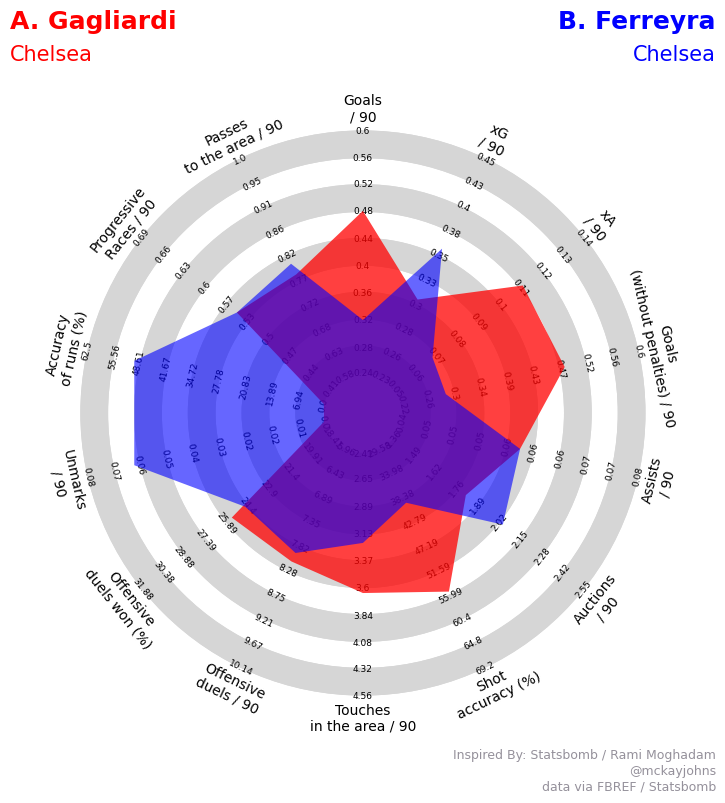

In [141]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red','blue'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

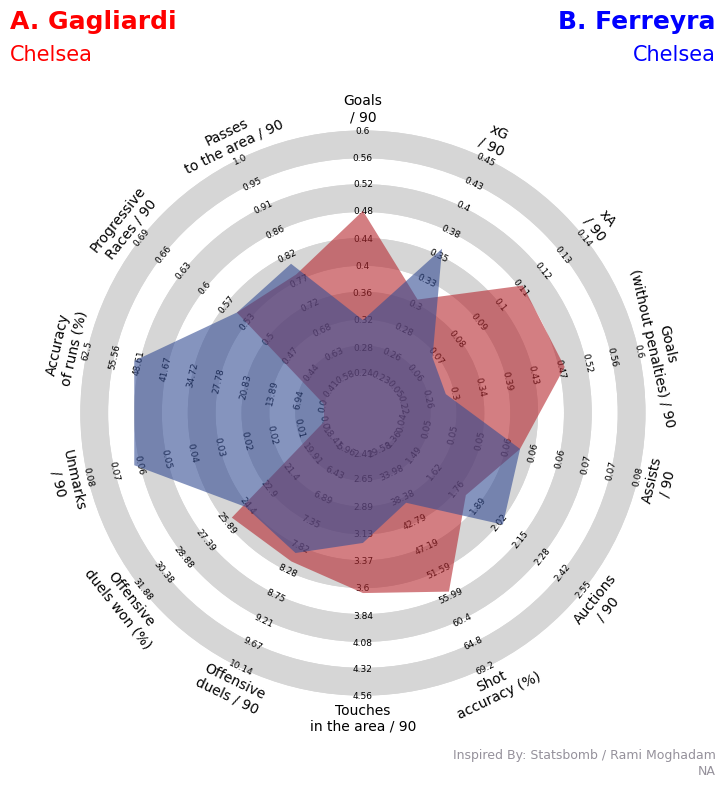

In [144]:

## endnote 
endnote = "NA"

## instantiate object
radar = Radar()

## plot radar -- compare
fig, ax = radar.plot_radar(ranges=ranges, params=params, values=values, 
                           radar_color=['#B6282F', '#344D94'], 
                           title=title, endnote=endnote,
                           compare=True)

In [2]:
from soccerplots.radar_chart import Radar
import matplotlib.pyplot as plt

def graficar_comparacion(jugador1, comparacion, jugador2=None, rol=None, metricas=None):
    df_filtrado = df.copy()

    if jugador1 not in df_filtrado['jugador'].values:
        print(f"⚠️ '{jugador1}' no está en el dataset.")
        return

    if comparacion == "Jugador vs Jugador":
        if not jugador2 or jugador2 not in df_filtrado['jugador'].values:
            print(f"⚠️ Debes seleccionar un segundo jugador válido.")
            return
        valores_1 = df_filtrado[df_filtrado['jugador'] == jugador1][metricas].values.flatten()
        valores_2 = df_filtrado[df_filtrado['jugador'] == jugador2][metricas].values.flatten()
        etiquetas = [jugador1, jugador2]

    elif comparacion == "Jugador vs Promedio General":
        valores_1 = df_filtrado[df_filtrado['jugador'] == jugador1][metricas].values.flatten()
        valores_2 = df_filtrado[df_filtrado['jugador'] != jugador1][metricas].mean().values
        etiquetas = [jugador1, "Promedio general"]

    elif comparacion == "Jugador vs Promedio por Posición":
        pos = df_filtrado[df_filtrado['jugador'] == jugador1]['posicion'].values[0]
        df_pos = df_filtrado[(df_filtrado['posicion'] == pos) & (df_filtrado['jugador'] != jugador1)]
        valores_1 = df_filtrado[df_filtrado['jugador'] == jugador1][metricas].values.flatten()
        valores_2 = df_pos[metricas].mean().values
        etiquetas = [jugador1, f"Promedio {pos}"]

    else:
        print("Comparación inválida.")
        return

    # Rango min-max
    ranges = [(df_filtrado[m].min(), df_filtrado[m].max()) for m in metricas]

    # Radar
    radar = Radar(label_fontsize=8, range_fontsize=6)
    fig, ax = radar.plot_radar(
        ranges=ranges,
        params=metricas,
        values=[valores_1, valores_2],
        radar_color=["#1a78cf", "#ff9300"],
        alphas=[0.8, 0.4],
        title={
            "title_name": etiquetas[0],
            "title_color": "#1a78cf",
            "subtitle_name": f"vs {etiquetas[1]}",
            "subtitle_color": "#ff9300"
        },
        compare=True
    )
    plt.show()


In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

pd.options.display.max_columns = None
df_wyscout_players = pd.read_excel('../../data/input/Argentina_B/players/players.xlsx').reset_index(drop=True)
df_wyscout_players = pd.read_excel(r'C:\Users\e.rangel\Documents\emra\Futbol-R-Python-Quarto\R\Modulo 2\data\out\players_liga_argentina_B.csv').reset_index(drop=True)

In [11]:
df_wyscout_players.head(2)

,Jugador,Equipo,Equipo durante el período seleccionado,Posición específica,Edad,Valor de mercado (Transfermarkt),Vencimiento contrato,Partidos jugados,Minutos jugados,Goles,xG,Asistencias,xA,Duelos/90,"Duelos ganados, %",País de nacimiento,Pasaporte,Pie,Altura,Peso,En prestamo,Acciones defensivas realizadas/90,Duelos defensivos/90,"Duelos defensivos ganados, %",Duelos aéreos en los 90,"Duelos aéreos ganados, %",Entradas/90,Posesión conquistada después de una entrada,Tiros interceptados/90,Interceptaciones/90,Posesión conquistada después de una interceptación,Faltas/90,Tarjetas amarillas,Tarjetas amarillas/90,Tarjetas rojas,Tarjetas rojas/90,Acciones de ataque exitosas/90,Goles/90,Goles (excepto los penaltis),"Goles, excepto los penaltis/90",xG/90,Goles de cabeza,Goles de cabeza/90,Remates,Remates/90,"Tiros a la portería, %","Goles hechos, %",Asistencias/90,Centros/90,"Precisión centros, %",Centros desde la banda izquierda/90,"Precisión centros desde la banda izquierda, %",Centros desde la banda derecha/90,"Precisión centros desde la banda derecha, %",Centros al área pequeña/90,Regates/90,"Regates realizados, %",Duelos atacantes/90,"Duelos atacantes ganados, %",Toques en el área de penalti/90,Carreras en progresión/90,Aceleraciones/90,Pases recibidos /90,Pases largos recibidos/90,Faltas recibidas/90,Pases/90,"Precisión pases, %",Pases hacia adelante/90,"Precisión pases hacia adelante, %",Pases hacia atrás/90,"Precision pases hacia atrás, %",Pases laterales/90,"Precisión pases laterales, %",Pases cortos / medios /90,"Precisión pases cortos / medios, %",Pases largos/90,"Precisión pases largos, %","Longitud media pases, m","Longitud media pases largos, m",xA/90,Asistencias/90.1,Second assists/90,Third assists/90,Desmarques/90,"Precisión desmarques, %",Jugadas claves/90,Pases en el último tercio/90,"Precisión pases en el último tercio, %",Pases al área de penalti/90,"Pases hacía el área pequeña, %",Pases en profundidad/90,"Precisión pases en profundidad, %",Ataque en profundidad/90,Centros desde el último tercio/90,Pases progresivos/90,"Precisión pases progresivos, %",Goles recibidos,Goles recibidos/90,Remates en contra,Remates en contra/90,Porterías imbatidas en los 90,"Paradas, %",xG en contra,xG en contra/90,Goles evitados,Goles evitados/90,Pases hacía atrás recibidos del arquero/90,Salidas/90,Duelos aéreos en los 90.1,Tiros libres/90,Tiros libres directos/90,"Tiros libres directos, %",Córneres/90,Penaltis a favor,"Penaltis realizados, %"
0,F. Ferrero,Nueva Chicago,Nueva Chicago,GK,30.0,175000,NaN,42,4136,0,0.0,1,0.0,0.89,87.80,Argentina,Argentina,derecho,184,83,no,2.26,0.17,62.5,0.44,90.00,0.02,0.03,0.0,2.13,3.31,0.04,3,0.07,0,0.0,0.02,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,100.00,0.0,0.0,0.0,6.59,0.15,0.30,16.21,78.12,11.18,69.07,0.02,100.0,4.81,98.64,7.31,97.32,8.83,62.81,42.48,57.94,0.0,0.0,0.0,0.00,0.02,100.0,0.02,4.98,59.83,0.30,14.29,0.22,20.0,0.04,0.0,6.57,82.12,36,0.78,158,3.44,15,77.22,44.29,0.96,8.29,0.180,0.0,1.91,0.44,NaN,NaN,NaN,0.0,0,0.0
1,D. Sand,San Martín Tucumán,San Martín Tucumán,GK,37.0,100000,NaN,39,3824,0,0.0,0,0.0,1.08,80.43,Argentina,Argentina,derecho,180,74,no,1.55,0.07,100.0,0.71,76.67,0.00,0.00,0.0,1.48,2.39,0.02,7,0.16,0,0.0,0.00,0.0,0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,85.71,0.0,0.0,0.0,9.06,0.28,0.26,18.90,85.43,9.86,74.22,0.00,0.0,8.80,98.66,11.44,98.15,7.41,66.35,36.16,49.12,0.0,0.0,0.0,0.02,0.00,0.0,0.00,2.47,57.14,0.09,0.00,0.02,0.0,0.00,0.0,5.44,77.49,21,0.49,131,3.08,24,83.97,24.80,0.58,3.80,0.089,0.0,2.57,0.71,NaN,NaN,NaN,0.0,0,0.0


In [ ]:
df = df_wyscout_players.copy()
# Widgets
jugadores = sorted(df['Jugador'].unique().tolist())
roles = list(metricas_por_tipo.keys())
comparaciones = ["Jugador vs Jugador", "Jugador vs Promedio General", "Jugador vs Promedio por Posición"]

jugador1_dropdown = widgets.Dropdown(options=jugadores, description="Jugador 1:")
comparacion_dropdown = widgets.Dropdown(options=comparaciones, description="Comparar:")
jugador2_dropdown = widgets.Dropdown(options=jugadores, description="Jugador 2:")
rol_dropdown = widgets.Dropdown(options=roles, description="Rol:")
metricas_select = widgets.SelectMultiple(options=[], description="Métricas", rows=10)

# Actualizar métricas cuando cambia el rol
def actualizar_metricas(*args):
    metricas_select.options = metricas_por_tipo[rol_dropdown.value]
rol_dropdown.observe(actualizar_metricas, names='value')
actualizar_metricas()

# Mostrar/ocultar widgets según el tipo de comparación
def actualizar_visibilidad(*args):
    with output:
        clear_output(wait=True)
        display(jugador1_dropdown, comparacion_dropdown)
        if comparacion_dropdown.value == "Jugador vs Jugador":
            display(jugador2_dropdown)
        display(rol_dropdown, metricas_select, boton)
comparacion_dropdown.observe(actualizar_visibilidad, names='value')

# Botón para graficar
output = widgets.Output()
def on_click(b):
    with output:
        clear_output(wait=True)
        display(jugador1_dropdown, comparacion_dropdown)
        if comparacion_dropdown.value == "Jugador vs Jugador":
            display(jugador2_dropdown)
        display(rol_dropdown, metricas_select)
        graficar_comparacion(
            jugador1=jugador1_dropdown.value,
            comparacion=comparacion_dropdown.value,
            jugador2=jugador2_dropdown.value if comparacion_dropdown.value == "Jugador vs Jugador" else None,
            rol=rol_dropdown.value,
            metricas=list(metricas_select.value)
        )
boton = widgets.Button(description="Graficar Radar")
boton.on_click(on_click)

# Mostrar interfaz
display(jugador1_dropdown, comparacion_dropdown, rol_dropdown, metricas_select, boton, output)


Dropdown(description='Jugador 1:', options=(' Joel Martínez', 'A. Aguirre', 'A. Agüero', 'A. Aleo', 'A. Alfons…

Dropdown(description='Comparar:', options=('Jugador vs Jugador', 'Jugador vs Promedio General', 'Jugador vs Pr…

Dropdown(description='Rol:', options=('Delanteros', 'Extremos', 'Mediocampo_Ofensivo', 'Mediocampo', 'Mediocam…

SelectMultiple(description='Métricas', options=('goles_90', 'x_g_90', 'x_a_90', 'goles_excepto_los_penaltis_90…

Button(description='Graficar Radar', style=ButtonStyle())

Output()